In [1]:
from pandas import read_excel 
df = read_excel('Email Response Types.xlsx')
print(df.head())

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


                                            Response Type of Response
0  \nFrom: Dick, Andrew <adick@letica.com> \nSent...              Hot
1  From: David.Joyce@pinkerton.com <David.Joyce@p...              Hot
2  From: Derrick Brown <derrick.brown@csdental.co...              Hot
3  From: Christopher Antao <cantao@kdc.org> \nSen...              Hot
4  From: Connor, Jennifer <Jennifer.Connor@lanthe...              Hot


In [2]:
df.head()

,Response,Type of Response
0,"\nFrom: Dick, Andrew <adick@letica.com> \nSent...",Hot
1,From: David.Joyce@pinkerton.com <David.Joyce@p...,Hot
2,From: Derrick Brown <derrick.brown@csdental.co...,Hot
3,From: Christopher Antao <cantao@kdc.org> \nSen...,Hot
4,"From: Connor, Jennifer <Jennifer.Connor@lanthe...",Hot


In [3]:
import pandas as pd
import re
email_body= []
for R in df['Response']:
    email = re.sub(r'(to\:[^\n]+\n|from\:[^\n]+\n|subject\:[^\n]+\n|sent\:[^\n]+\n|cc\:[^\n]+\n)', '', R.lower(), re.U)
    email_body.append(email)
EmailBody = pd.Series(email_body)
EmailBody.head()

a =df['Type of Response'].str.lower()
df['Type of Response']= a

In [4]:
df['Response']=EmailBody
df.head()

,Response,Type of Response
0,"\n\nhello kevin,\ni have time later next week....",hot
1,\nright now that time looks ok.\n\ndavid joyce...,hot
2,"\nmark, \n\ni am available in the afternoon fr...",hot
3,\nit is year end. please reach out after july...,hot
4,"\nhi kevin,\n\nthanks for reaching out. we'd ...",hot


In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


[nltk_data] Downloading package stopwords to /home/ctpl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
x= email_body
y= df['Type of Response']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [7]:
import re
import numpy as np
train_test_split?

In [8]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def text_prepare(text):
 
    text = text.lower()# lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)# delete stopwors from text
    return text

In [9]:
X_train = [text_prepare(x) for x in X_train]
X_test = [text_prepare(x) for x in X_test]
X_train[:3]

['please take email list',
 'andy short window time friday may 18th could take call 900 provided finished 930 conf call school leaders let know 900 confirmedthankssteve',
 'kevin im sorry responding earlier emails ive swamped since starting right building dashboards driving sales something changes future ill reach outthank joejoe spiresmanager']

In [10]:
from collections import defaultdict
# Dictionary of all tags from train corpus with their counts.
tags_counts = defaultdict(int)
# Dictionary of all words from train corpus with their counts.
words_counts = defaultdict(int)

for tags in y_train:
    for tag in tags:
        tags_counts[tag] += 1
for text in X_train:
    for word in text.split():
        words_counts[word] += 1


In [11]:
#Bag of words

DICT_SIZE = 1000
INDEX_TO_WORDS = sorted(words_counts.keys(), key=lambda x: words_counts[x], reverse=True)[:DICT_SIZE]
WORDS_TO_INDEX = {word:i for i, word in enumerate(INDEX_TO_WORDS)}
ALL_WORDS = WORDS_TO_INDEX.keys()

def my_bag_of_words(text, words_to_index, dict_size):

    result_vector = np.zeros(dict_size)
    for word in text.split():
        if word in words_to_index:
            result_vector[words_to_index[word]] += 1
    return result_vector

In [12]:
from scipy import sparse as sp_sparse

In [13]:
X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_train])
X_test_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_test])
print('X_train shape ', X_train_mybag.shape)
print('X_test shape ', X_test_mybag.shape)

X_train shape  (69, 1000)
X_test shape  (18, 1000)


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVectorizer?

In [15]:
#tfidf

def tfidf_features(X_train, X_test):

    # TF-IDF vectorizer with a proper parameters choice
    # Fit the vectorizer on the train set
    # Transform the train, test sets and return the result
    
    
    tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.9, ngram_range=(1, 3),
                                       token_pattern='(\S+)')
    
    X_train = tfidf_vectorizer.fit_transform(X_train)
    X_test = tfidf_vectorizer.transform(X_test)
    
    return X_train, X_test

In [16]:
X_train_tfidf, X_test_tfidf = tfidf_features(X_train, X_test)

In [17]:
X_train_tfidf[:5]

<5x39 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

k=1 55.000000
k=2 50.714286
k=3 62.142857
k=4 62.142857
k=5 62.142857
k=6 57.857143
k=7 57.857143
k=8 52.142857
k=9 52.142857
k=10 51.904762
k=11 51.904762
k=12 49.047619
k=13 46.428571
k=14 45.000000
k=15 45.000000
k=16 49.285714
k=17 47.857143
k=18 49.047619
k=19 46.190476
k=20 46.190476
k=21 47.619048
k=22 47.619048
k=23 44.761905
k=24 43.333333
k=25 46.190476
The optimal number of neighbors is 2 with 62.142857


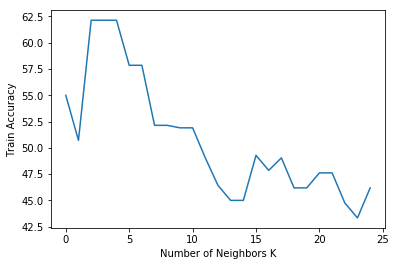

In [19]:
# 1. KNN classifier on tfidf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_train_tfidf, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %f" % (k_value, scores.mean()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %f" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_tfidf, y_train)
knnpred = knn.predict(X_test_tfidf)

print(accuracy_score(y_test, knnpred)*100)


44.44444444444444


k=1 40.476190
k=2 39.285714
k=3 36.428571
k=4 33.571429
k=5 36.428571
k=6 36.428571
k=7 36.428571
k=8 40.714286
k=9 40.714286
k=10 34.761905
k=11 37.619048
k=12 36.190476
k=13 36.190476
k=14 34.761905
k=15 34.761905
k=16 34.761905
k=17 34.761905
k=18 34.761905
k=19 36.190476
k=20 34.761905
k=21 34.761905
k=22 34.761905
k=23 34.761905
k=24 34.761905
k=25 34.761905
The optimal number of neighbors is 7 with 40.714286


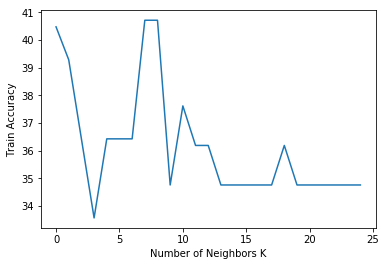

In [22]:
# 1. KNN classifier on bag of words
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_train_mybag, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %f" % (k_value, scores.mean()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %f" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_mybag, y_train)
knnpred = knn.predict(X_test_mybag)

print(accuracy_score(y_test, knnpred)*100)

55.55555555555556


In [24]:
# 2. Logistic regression on tfidf
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train_tfidf,y_train)
logpred = logmodel.predict(X_test_tfidf)

print(accuracy_score(y_test, logpred)*100)


38.88888888888889


In [25]:
# 2. Logistic regression on bag of words
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train_mybag,y_train)
logpred = logmodel.predict(X_test_mybag)

print(accuracy_score(y_test, logpred)*100)


50.0


In [26]:
# 3. Linear classifiers: Support Vector Machines (kernel: sigmoid) for tfidf

from sklearn.svm import SVC
for this_gamma in [.01, 1.0, 10.0]:
    svc= SVC(kernel = 'sigmoid', gamma= this_gamma)
    svc.fit(X_train_tfidf, y_train)
    svcpred = svc.predict(X_test_tfidf)
    print(accuracy_score(y_test, svcpred)*100)


33.33333333333333
50.0
38.88888888888889


In [27]:
# 3. Linear classifiers: Support Vector Machines (kernel: sigmoid) for bag of words

from sklearn.svm import SVC
for this_gamma in [.01, 1.0, 10.0]:
    svc= SVC(kernel = 'sigmoid', gamma= this_gamma)
    svc.fit(X_train_mybag, y_train)
    svcpred = svc.predict(X_test_mybag)
    print(accuracy_score(y_test, svcpred)*100)


33.33333333333333
55.55555555555556
38.88888888888889


In [28]:
# 4. Linear classifiers: Support Vector Machines (kernel: Radial Basis Function) for tfidf

from sklearn.svm import SVC
for this_gamma in [.01, .02, .03, .04, .05, .06, .07, .08, .09, .1, 1.0, 10.0]:
    svc= SVC(kernel = 'rbf', gamma= this_gamma)
    svc.fit(X_train_tfidf, y_train)
    svcpred = svc.predict(X_test_tfidf)
    print(this_gamma, accuracy_score(y_test, svcpred)*100)


0.01 33.33333333333333
0.02 33.33333333333333
0.03 33.33333333333333
0.04 33.33333333333333
0.05 33.33333333333333
0.06 33.33333333333333
0.07 33.33333333333333
0.08 33.33333333333333
0.09 33.33333333333333
0.1 38.88888888888889
1.0 44.44444444444444
10.0 33.33333333333333


In [29]:
# 4. Linear classifiers: Support Vector Machines (kernel: Radial Basis Function) for badg of words

from sklearn.svm import SVC
for this_gamma in [.01, .02, .03, .04, .05, .06, .07, .08, .09, .1, 1.0, 10.0]:
    svc= SVC(kernel = 'rbf', gamma= this_gamma)
    svc.fit(X_train_mybag, y_train)
    svcpred = svc.predict(X_test_mybag)
    print(this_gamma, accuracy_score(y_test, svcpred)*100)

0.01 33.33333333333333
0.02 33.33333333333333
0.03 38.88888888888889
0.04 33.33333333333333
0.05 38.88888888888889
0.06 38.88888888888889
0.07 38.88888888888889
0.08 38.88888888888889
0.09 33.33333333333333
0.1 33.33333333333333
1.0 33.33333333333333
10.0 33.33333333333333


In [30]:
# 5. Linear classifiers: Support Vector Machines (kernel: Linear) for tfidf

from sklearn.svm import SVC
for this_gamma in [.01, 1.0, 10.0]:
    svc= SVC(kernel = 'linear', gamma= this_gamma)
    svc.fit(X_train_tfidf, y_train)
    svcpred = svc.predict(X_test_tfidf)
    print(accuracy_score(y_test, svcpred)*100)

50.0
50.0
50.0


In [31]:
# 5. Linear classifiers: Support Vector Machines (kernel: Linear) for bag of words

from sklearn.svm import SVC
svc= SVC(kernel = 'linear')
svc.fit(X_train_mybag, y_train)
svcpred = svc.predict(X_test_mybag)
print(accuracy_score(y_test, svcpred)*100)

50.0


In [32]:
# 6. Decision Tree Classifier for tfidf
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train_tfidf, y_train)
dtreepred = dtree.predict(X_test_tfidf)

print(accuracy_score(y_test, dtreepred)*100)



50.0


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [33]:
# 6. Decision Tree Classifier for bag of words
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train_mybag, y_train)
dtreepred = dtree.predict(X_test_mybag)

print(accuracy_score(y_test, dtreepred)*100)



55.55555555555556


In [36]:
# 7. Random Forest Classifier(n=50) for tfidf

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 50)#criterion = entopy,gini
rfc.fit(X_train_tfidf, y_train)
rfcpred = rfc.predict(X_test_tfidf)

print(accuracy_score(y_test, rfcpred)*100)

50.0


In [35]:
# 7. Random Forest Classifier(n=200) for bag of words

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train_mybag, y_train)
rfcpred = rfc.predict(X_test_mybag)

print(accuracy_score(y_test, rfcpred)*100)

50.0


In [40]:
# 8. Random Forest Classifier(n=1000) for tfidf

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 1000)#criterion = entopy,gini
rfc.fit(X_train_tfidf, y_train)
rfcpred = rfc.predict(X_test_tfidf)

print(accuracy_score(y_test, rfcpred)*100)

50.0


In [41]:
# 8. Random Forest Classifier(n=1000) for bag of words

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 1000)#criterion = entopy,gini
rfc.fit(X_train_mybag, y_train)
rfcpred = rfc.predict(X_test_mybag)

print(accuracy_score(y_test, rfcpred)*100)

44.44444444444444


In [45]:
# 9. naive bayes classifier for tfidf

from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train_tfidf.toarray(), y_train)
gaussiannbpred = gaussiannb.predict(X_test_tfidf.toarray())
print(accuracy_score(y_test, gaussiannbpred)*100)


38.88888888888889


In [46]:
# 9. naive bayes classifier for bag of words

from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train_mybag.toarray(), y_train)
gaussiannbpred = gaussiannb.predict(X_test_mybag.toarray())
print(accuracy_score(y_test, gaussiannbpred)*100)

72.22222222222221


In [47]:
# 10. Gradient boosting classifier for tfidf

from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train_tfidf, y_train)
gbkpred = gbk.predict(X_test_tfidf)

print(accuracy_score(y_test, gbkpred)*100)

38.88888888888889


In [48]:
# 10. Gradient boosting classifier for bag of words

from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train_mybag, y_train)
gbkpred = gbk.predict(X_test_mybag)

print(accuracy_score(y_test, gbkpred)*100)

72.22222222222221


In [50]:
# 11. XGBoost Classifier for tfidf

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_tfidf, y_train)
xgbprd = xgb.predict(X_test_tfidf)

print(accuracy_score(y_test, xgbprd)*100)

38.88888888888889


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [51]:
# 11. XGBoost Classifier for bag of words

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_mybag, y_train)
xgbprd = xgb.predict(X_test_mybag)

print(accuracy_score(y_test, xgbprd)*100)

61.111111111111114


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
